# 📚 Imports

In [40]:
#!pip install folium#!pip install autoviz

import pandas as pd
import numpy as np
from autoviz.classify_method import data_cleaning_suggestions

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 📖 Data

In [22]:
df = pd.read_csv('data/startup data.csv')

In [23]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

# ⚙️ Data Cleaning Suggestions

In [25]:
data_cleaning_suggestions(df)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Unnamed: 0,923,int64,0,0.000000,100.000000,0,possible ID column: drop
object_id,922,object,0,0.000000,99.891658,1,combine rare categories
id,922,object,0,0.000000,99.891658,1,combine rare categories
name,922,object,0,0.000000,99.891658,1,combine rare categories
age_last_funding_year,756,float64,0,0.000000,81.906826,0,skewed: cap or drop outliers
last_funding_at,680,object,0,0.000000,73.672806,1,combine rare categories
latitude,652,float64,0,0.000000,70.639220,0,
longitude,651,float64,0,0.000000,70.530878,0,
age_first_funding_year,634,float64,0,0.000000,68.689057,0,skewed: cap or drop outliers
first_funding_at,585,object,0,0.000000,63.380282,1,combine rare categories


# 🗑 Drop Unnecessary Columns

In [26]:
df.drop(['Unnamed: 6', 'Unnamed: 0', 'id', 'name', 'object_id', 'first_funding_at',
         'zip_code', 'city', 'founded_at', 'closed_at', 'age_last_milestone_year',
         'age_first_milestone_year', 'state_code.1',  'last_funding_at'], axis = 1, inplace = True)

# 🗑 Removing outliers

In [27]:
std_deviation = 2
mean = df['avg_participants'].mean()
std = df['avg_participants'].std()

upper_threshold = mean + (std_deviation * std)
lower_threshold = mean - (std_deviation * std)
df = df[(df['avg_participants'] >= lower_threshold) & (df['avg_participants'] <= upper_threshold)]

In [28]:
df.head()

,state_code,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,1,2.2493,3.0027,3,3,375000,3,...,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,1,5.1260,9.9973,9,4,40100000,1,...,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,1,1.0329,1.0329,5,1,2600000,2,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,1,3.1315,5.3151,5,3,40000000,1,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,0,0.0000,1.6685,2,2,1300000,1,...,0,1,1,0,0,0,0,1.0000,1,closed


# 👀 Visualization
---

In [29]:
latitude_initial = 39.8283
longitude_initial = -50.0000

map = folium.Map(location = [latitude_initial, longitude_initial], 
                  zoom_start = 3, tiles = 'cartodbpositron')


for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup = row['state_code']).add_to(map)

map

<AxesSubplot:>

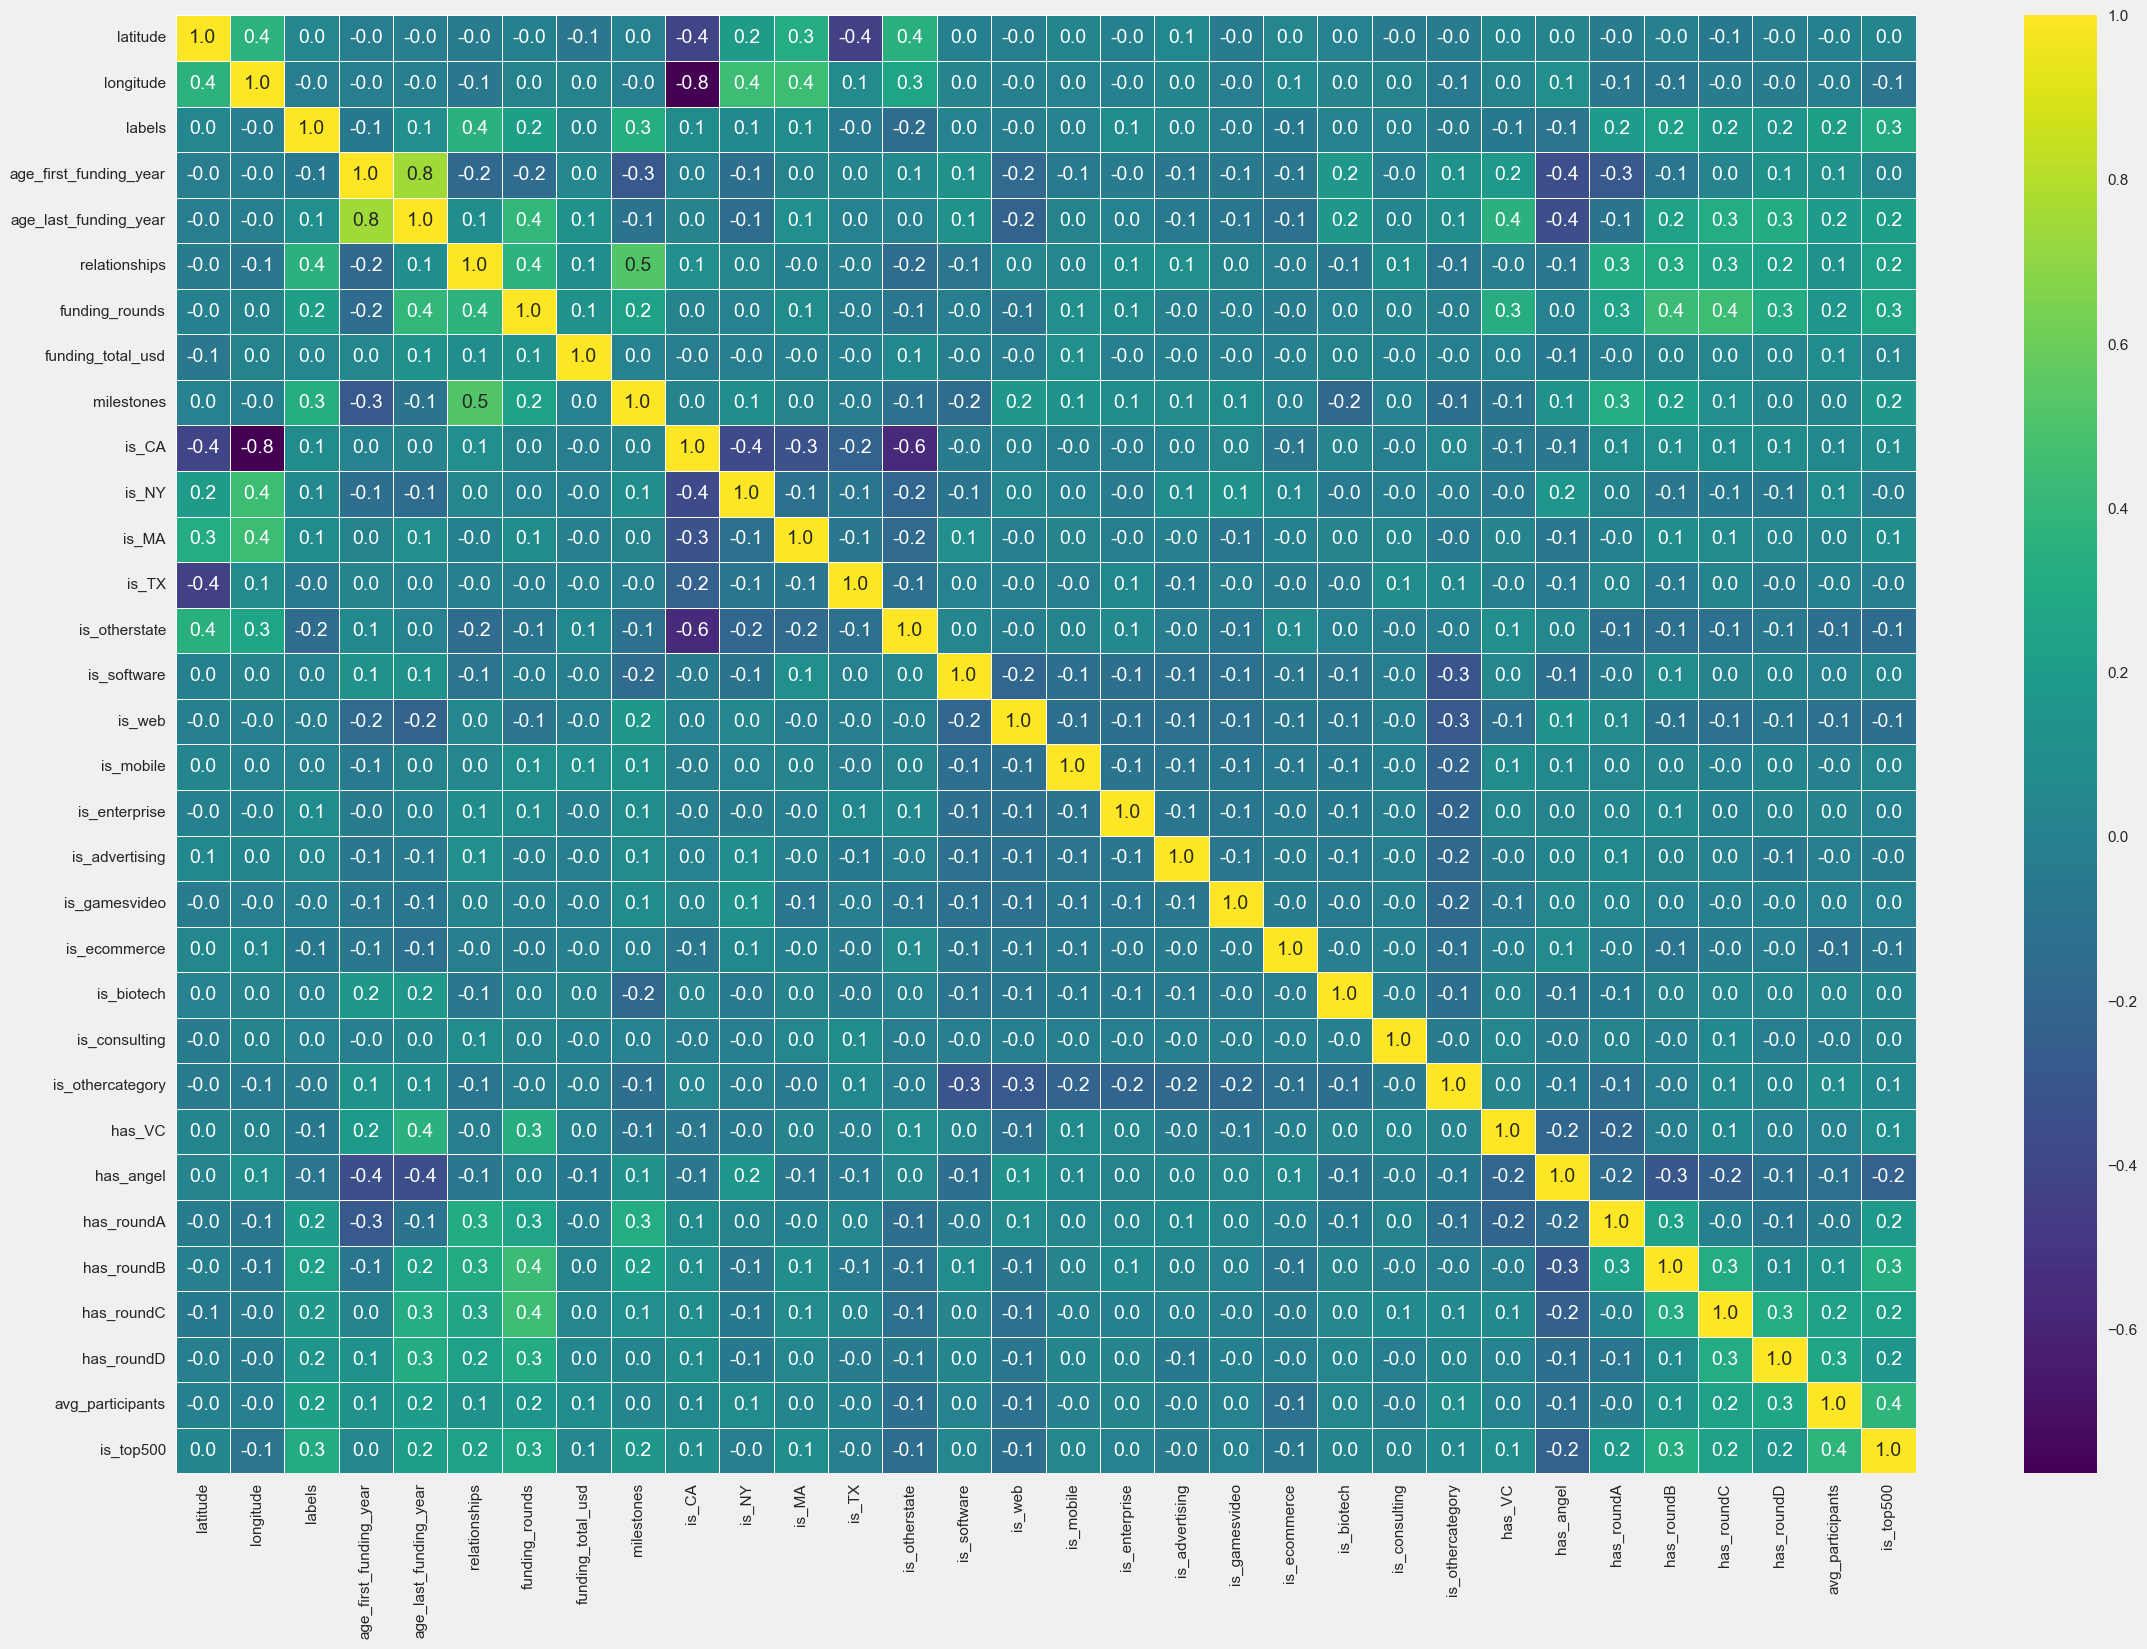

In [30]:
plt.figure(figsize = (25, 18))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis', linewidth = 0.5, fmt = '.1f')

<AxesSubplot:xlabel='status', ylabel='count'>

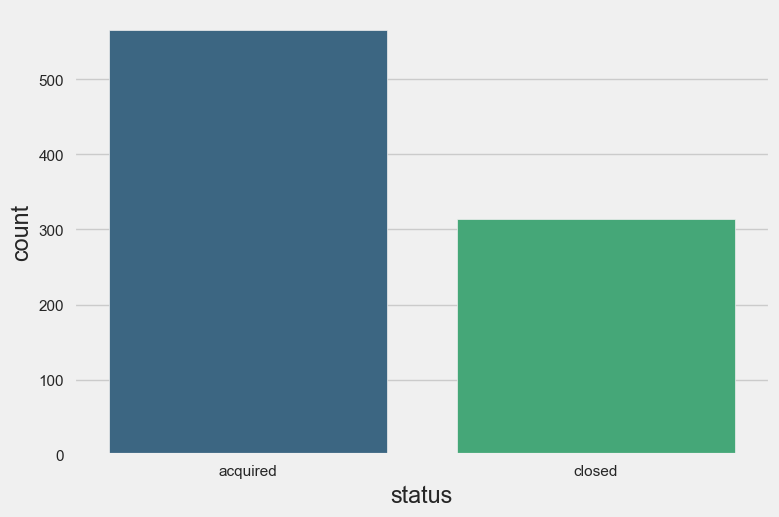

In [31]:
sns.countplot(x = df['status'], palette = 'viridis')

# 🧬 Object Variables for Numerics
---

In [32]:
list_str = df.select_dtypes(include = 'object').columns
le = LabelEncoder()

for c in list_str:
    df[c] = le.fit_transform(df[c])

In [33]:
df.head()

,state_code,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,2,42.358880,-71.056820,1,2.2493,3.0027,3,3,375000,3,...,1,0,1,0,0,0,0,1.0000,0,0
1,2,37.238916,-121.973718,1,5.1260,9.9973,9,4,40100000,1,...,0,1,0,0,1,1,1,4.7500,1,0
2,2,32.901049,-117.192656,1,1.0329,1.0329,5,1,2600000,2,...,0,0,0,1,0,0,0,4.0000,1,0
3,2,37.320309,-122.050040,1,3.1315,5.3151,5,3,40000000,1,...,0,0,0,0,1,1,1,3.3333,1,0
4,2,37.779281,-122.419236,0,0.0000,1.6685,2,2,1300000,1,...,0,1,1,0,0,0,0,1.0000,1,1


# ✂️ Train and Test
---

In [34]:
X = df.drop(['status', 'latitude', 'longitude'], axis = 1)
y = df['status']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 0)

# 🏋🏾‍♀️ Training
---

In [46]:
lr = LogisticRegression()

lr.fit(xtrain, ytrain)
pred_lr = lr.predict(xtest)

In [42]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
pred_dt = dt.predict(xtest)

# 📋 Results
---

In [43]:
accuracy = accuracy_score(ytest, pred_lr)
precision = precision_score(ytest, pred_lr)
recall = recall_score(ytest, pred_lr)
f1 = f1_score(ytest, pred_lr)

print('LogisticRegression Accuracy: %f' % accuracy)
print('LogisticRegression Precision: %f' % precision)
print('LogisticRegression Recall: %f' % recall)
print('LogisticRegression F1-Score: %f' % f1)

LogisticRegression Accuracy: 0.640909
LogisticRegression Precision: 0.000000
LogisticRegression Recall: 0.000000
LogisticRegression F1-Score: 0.000000


In [44]:
accuracy = accuracy_score(ytest, pred_dt)
precision = precision_score(ytest, pred_dt)
recall = recall_score(ytest, pred_dt)
f1 = f1_score(ytest, pred_dt)

print('DecisionTree Accuracy: %f' % accuracy)
print('DecisionTree Precision: %f' % precision)
print('DecisionTree Recall: %f' % recall)
print('DecisionTree F1-Score: %f' % f1)

DecisionTree Accuracy: 1.000000
DecisionTree Precision: 1.000000
DecisionTree Recall: 1.000000
DecisionTree F1-Score: 1.000000


#### I didn't understand why the result of the LogisticRegression model was so bad, but on the other hand the DecisionTree model was perfect
---

# 🏁 The End! Feel free to criticize! 🏁